<a href="https://colab.research.google.com/github/MeldaChen/Group-4/blob/main/%E5%BD%B1%E5%83%8F%E5%89%8D%E8%99%95%E7%90%86%E8%A3%81%E5%88%87%E8%88%87%E7%94%9F%E6%88%90%E6%AF%94%E5%B0%8D%E5%AD%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont, ImageDraw, Image


m1 = cv2.imread('A003.jpg', 1)

copy = m1.copy()

erode = cv2.erode(copy, np.ones((30, 30))) #抓字

gray = cv2.cvtColor(copy, cv2.COLOR_BGR2GRAY) #轉灰階

blur = cv2.GaussianBlur(gray,(5,5),0)   #模糊化


canny = cv2.Canny(blur, 70, 210)

th, canny = cv2.threshold(canny, 10, 255, cv2.THRESH_BINARY)

morph = cv2.morphologyEx(canny, cv2.MORPH_GRADIENT, np.ones((10, 10))) 
p, t = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 
if len(p)== 1:
    x, y, w, h = cv2.boundingRect(p[0]) 
    cv2.rectangle(m1, (x,y), (x+w, y+h), (255, 255, 255), 2) #框線改白色
    cv2.imwrite("capture.png", m1[y : y + h, x : x + w]) #將框起來的地方存成capture.png

else:
  print("請靠近文字再拍攝一次")


AttributeError: ignored

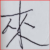

(50, 50, 3)


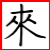

(50, 50, 3)


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import ImageFont, ImageDraw, Image

capture_img = cv2.imread('capture.png', 1)

resize_capture = cv2.resize(capture_img, (50, 50), interpolation=cv2.INTER_AREA)
cv2.imwrite("resize_capture.png", resize_capture) #存成 50*50 的手寫字

compare_word = np.full((50, 50, 3), (255, 255, 255), np.uint8) 
compare_word = Image.fromarray(compare_word)
ImageDraw.Draw(compare_word).text((0,0),
            ("來"), #要換成練習的字
            (0, 0, 0),
            ImageFont.truetype("ThePeakFontBeta_V0_101.ttf", 50)  #要上傳字體
)
compare_word = np.array(compare_word)
cv2.imwrite("compare.png", compare_word) # 生成的字存成 compare.png，要再取一次輪廓

compare_img = cv2.imread('compare.png', 1) 

copy = compare_img.copy()

# erode = cv2.erode(copy, np.ones((30, 30)))  

# blur = cv2.GaussianBlur(erode,(5,5),0) 

canny = cv2.Canny(copy, 70, 210)

th, canny = cv2.threshold(canny, 10, 255, cv2.THRESH_BINARY)

morph = cv2.morphologyEx(canny, cv2.MORPH_GRADIENT, np.ones((10, 10))) 
p, t = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(p[0]) 
cv2.rectangle(compare_img, (x,y), (x+w, y+h), (255, 255, 255), 2)  #框線改白色
cv2.imwrite("compare2.png", compare_img[y : y + h, x : x + w]) #要再resize

compare2_img = cv2.imread('compare2.png', 1)

resize_compare = cv2.resize(compare2_img, (50, 50), interpolation=cv2.INTER_AREA)
cv2.imwrite("resize_compare.png", resize_compare) #存成 50*50 的比對字


cv2_imshow(resize_capture)
print(resize_capture.shape)
cv2_imshow(resize_compare)
print(resize_compare.shape) # 最後請用resize_capture.png 跟resize_compare.png 比對分數
